In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [29]:
final_population_df=pd.read_csv('//Users/amitkommineni/Desktop/SEM 3/650/Project/Final_population_combined_CR_values.csv')

# Display the first few rows
print(final_population_df.head())

   subject_id  hadm_id  icustay_id gender  age               ethnicity  \
0        6321   171988      244279      M   31  BLACK/AFRICAN AMERICAN   
1        5772   133327      225689      F   57                   WHITE   
2       11242   116244      262657      F   39   UNKNOWN/NOT SPECIFIED   
3        3084   152571      206423      F   50                   WHITE   
4       20312   189515      298077      M   62  BLACK/AFRICAN AMERICAN   

   weight   height  dm_type complications  ... saps_ii  oasis  sofa  gcs_eyes  \
0     NaN      NaN     T1DM           NaN  ...       6     14     0       NaN   
1     NaN  163.576     T1DM           NaN  ...      13     17     0       NaN   
2     NaN  160.020     T1DM           NaN  ...       6     14     0       NaN   
3     NaN      NaN  Unknown           NaN  ...      13     14     0       NaN   
4     NaN  177.800     T2DM           NaN  ...      18     17     0       NaN   

   gcs_motor  gcs_verbal  infusion_volume  total_urine_output  \
0  

In [30]:
# Print column names and data types
print(final_population_df.dtypes)

subject_id              int64
hadm_id                 int64
icustay_id              int64
gender                 object
age                     int64
ethnicity              object
weight                float64
height                float64
dm_type                object
complications          object
comorbidities          object
heart_rate            float64
systolic_bp           float64
diastolic_bp          float64
respiratory_rate      float64
temperature           float64
bicarbonate           float64
wbc                   float64
hemoglobin            float64
platelets             float64
sodium                float64
chloride              float64
bun                   float64
creatinine            float64
potassium             float64
glucose               float64
anion_gap             float64
saps_ii                 int64
oasis                   int64
sofa                    int64
gcs_eyes              float64
gcs_motor             float64
gcs_verbal            float64
infusion_v

In [31]:
#Shape of the data
print(f"Rows: {final_population_df.shape[0]}, Columns: {final_population_df.shape[1]}")

Rows: 822, Columns: 37


In [32]:
#Summary Statistics
print(final_population_df.describe(include='all'))  # Include object columns

          subject_id        hadm_id     icustay_id gender         age  \
count     822.000000     822.000000     822.000000    822  822.000000   
unique           NaN            NaN            NaN      2         NaN   
top              NaN            NaN            NaN      F         NaN   
freq             NaN            NaN            NaN    469         NaN   
mean    31827.439173  150966.000000  249623.991484    NaN   48.931873   
std     27848.388116   28588.956726   28905.475716    NaN   31.296939   
min        25.000000  100001.000000  200030.000000    NaN   15.000000   
25%     11335.000000  126428.750000  224587.250000    NaN   34.000000   
50%     21415.000000  153351.500000  248560.000000    NaN   46.000000   
75%     48376.000000  175786.750000  275523.500000    NaN   58.000000   
max     99928.000000  199924.000000  299590.000000    NaN  306.000000   

       ethnicity      weight      height dm_type  \
count        822  673.000000  475.000000     822   
unique        20   

In [33]:
#null values
print(final_population_df.isnull().sum())

subject_id              0
hadm_id                 0
icustay_id              0
gender                  0
age                     0
ethnicity               0
weight                149
height                347
dm_type                 0
complications         522
comorbidities         373
heart_rate             28
systolic_bp            29
diastolic_bp           29
respiratory_rate       33
temperature            29
bicarbonate            15
wbc                    24
hemoglobin             25
platelets              24
sodium                 15
chloride               15
bun                    15
creatinine             15
potassium              15
glucose                16
anion_gap              15
saps_ii                 0
oasis                   0
sofa                    0
gcs_eyes               31
gcs_motor              34
gcs_verbal             30
infusion_volume        28
total_urine_output    403
creatinine_48hrs       15
creatinine_7days      165
dtype: int64


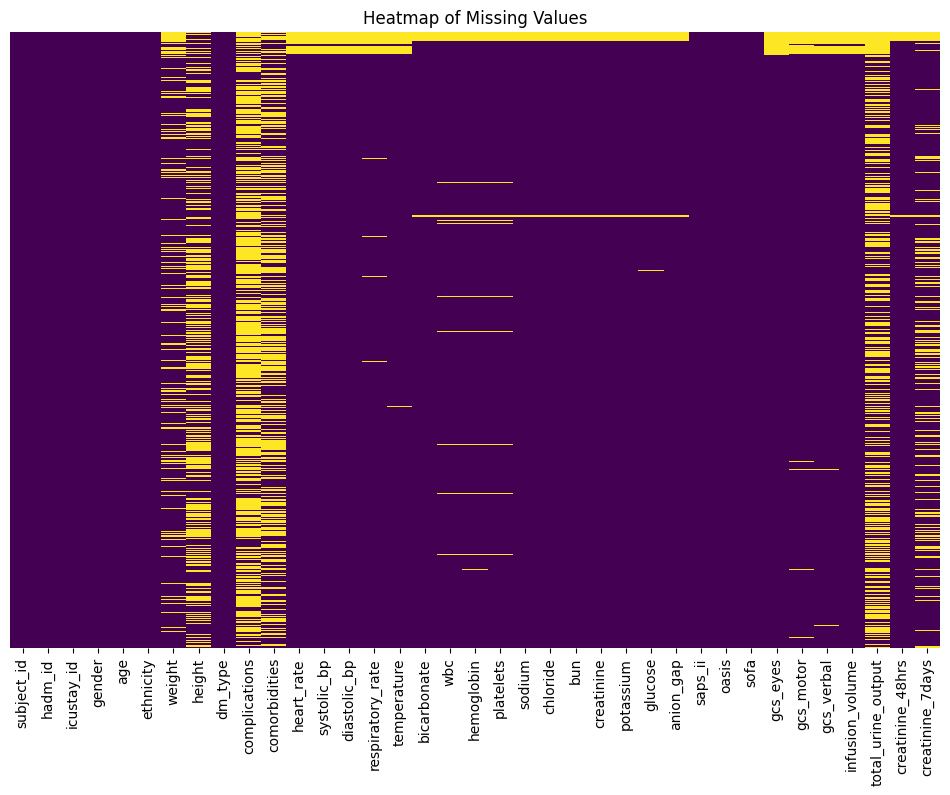

In [34]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(final_population_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

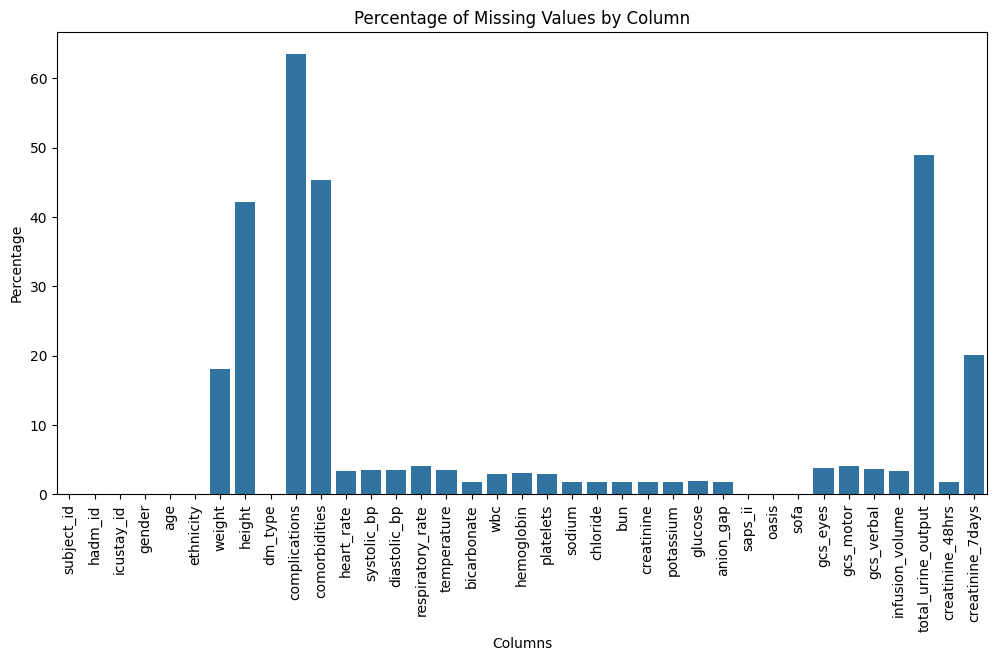

In [35]:
# Total and percentage of missing values
missing_data = final_population_df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Values']
missing_data['% Missing'] = (missing_data['Missing Values'] / len(final_population_df)) * 100

# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='% Missing', data=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [36]:
# Calculate the percentage of null values for each column
null_percentage = (final_population_df.isnull().sum() / len(final_population_df)) * 100

# Print the percentage of null values
print(null_percentage)

subject_id             0.000000
hadm_id                0.000000
icustay_id             0.000000
gender                 0.000000
age                    0.000000
ethnicity              0.000000
weight                18.126521
height                42.214112
dm_type                0.000000
complications         63.503650
comorbidities         45.377129
heart_rate             3.406326
systolic_bp            3.527981
diastolic_bp           3.527981
respiratory_rate       4.014599
temperature            3.527981
bicarbonate            1.824818
wbc                    2.919708
hemoglobin             3.041363
platelets              2.919708
sodium                 1.824818
chloride               1.824818
bun                    1.824818
creatinine             1.824818
potassium              1.824818
glucose                1.946472
anion_gap              1.824818
saps_ii                0.000000
oasis                  0.000000
sofa                   0.000000
gcs_eyes               3.771290
gcs_moto

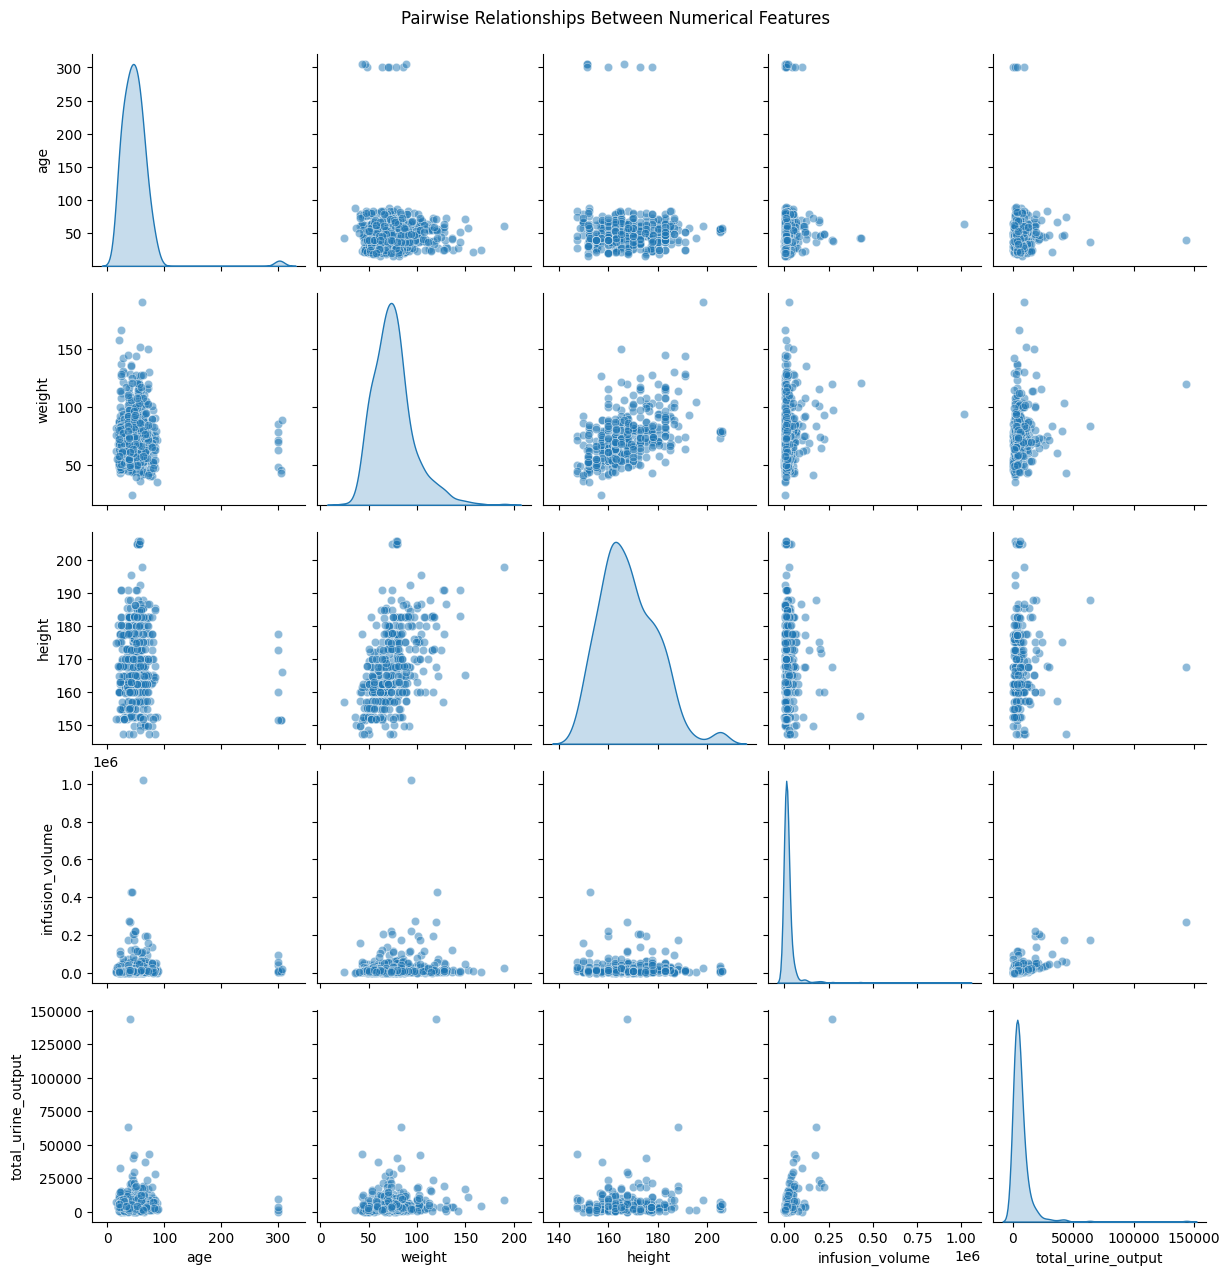

In [16]:
# Select a subset of numerical columns for visualization
numeric_cols = ['age', 'weight', 'height', 'infusion_volume', 'total_urine_output']

sns.pairplot(final_population_df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

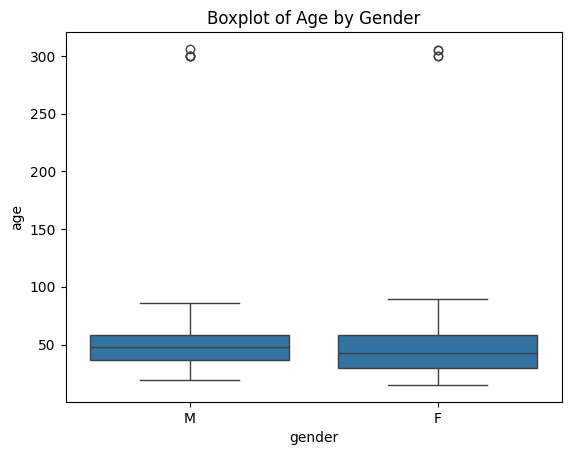

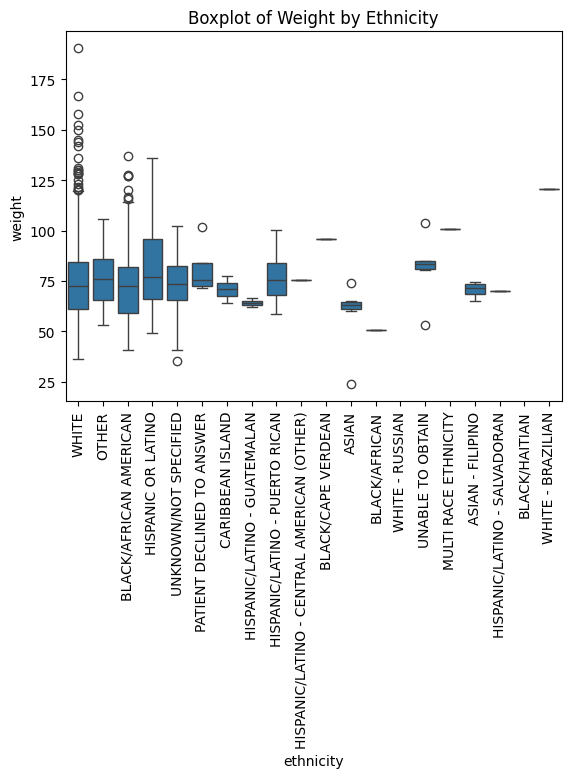

In [17]:
# Boxplot of age by gender
sns.boxplot(x='gender', y='age', data=final_population_df)
plt.title('Boxplot of Age by Gender')
plt.show()

# Boxplot of weight by ethnicity
sns.boxplot(x='ethnicity', y='weight', data=final_population_df)
plt.xticks(rotation=90)
plt.title('Boxplot of Weight by Ethnicity')
plt.show()

In [37]:
# Calculate the percentage of missing values
missing_percentage = final_population_df.isnull().sum() / len(final_population_df) * 100

# Separate columns into two groups based on missing percentage
columns_to_drop = missing_percentage[missing_percentage > 22].index.tolist()
columns_to_impute = missing_percentage[missing_percentage <= 22].index.tolist()

print("Columns to Drop:", columns_to_drop)
print("Columns to Impute:", columns_to_impute)
# Drop columns with >20% missing values
final_population_df = final_population_df.drop(columns=columns_to_drop)

print("Remaining Columns:", final_population_df.columns)

Columns to Drop: ['height', 'complications', 'comorbidities', 'total_urine_output']
Columns to Impute: ['subject_id', 'hadm_id', 'icustay_id', 'gender', 'age', 'ethnicity', 'weight', 'dm_type', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'temperature', 'bicarbonate', 'wbc', 'hemoglobin', 'platelets', 'sodium', 'chloride', 'bun', 'creatinine', 'potassium', 'glucose', 'anion_gap', 'saps_ii', 'oasis', 'sofa', 'gcs_eyes', 'gcs_motor', 'gcs_verbal', 'infusion_volume', 'creatinine_48hrs', 'creatinine_7days']
Remaining Columns: Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'age', 'ethnicity',
       'weight', 'dm_type', 'heart_rate', 'systolic_bp', 'diastolic_bp',
       'respiratory_rate', 'temperature', 'bicarbonate', 'wbc', 'hemoglobin',
       'platelets', 'sodium', 'chloride', 'bun', 'creatinine', 'potassium',
       'glucose', 'anion_gap', 'saps_ii', 'oasis', 'sofa', 'gcs_eyes',
       'gcs_motor', 'gcs_verbal', 'infusion_volume', 'creatinine_48hrs',
     

In [38]:
# Separate numerical columns
numerical_columns = final_population_df.select_dtypes(include=['number']).columns.tolist()

# Separate categorical columns
categorical_columns = final_population_df.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['subject_id', 'hadm_id', 'icustay_id', 'age', 'weight', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'temperature', 'bicarbonate', 'wbc', 'hemoglobin', 'platelets', 'sodium', 'chloride', 'bun', 'creatinine', 'potassium', 'glucose', 'anion_gap', 'saps_ii', 'oasis', 'sofa', 'gcs_eyes', 'gcs_motor', 'gcs_verbal', 'infusion_volume', 'creatinine_48hrs', 'creatinine_7days']
Categorical Columns: ['gender', 'ethnicity', 'dm_type']


In [39]:
# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute the columns with missing values
imputed_data = knn_imputer.fit_transform(final_population_df[numerical_columns])

# Replace the imputed data back into the DataFrame
final_population_df[numerical_columns] = imputed_data

print("Missing Values After Imputation:\n", final_population_df.isnull().sum())

Missing Values After Imputation:
 subject_id          0
hadm_id             0
icustay_id          0
gender              0
age                 0
ethnicity           0
weight              0
dm_type             0
heart_rate          0
systolic_bp         0
diastolic_bp        0
respiratory_rate    0
temperature         0
bicarbonate         0
wbc                 0
hemoglobin          0
platelets           0
sodium              0
chloride            0
bun                 0
creatinine          0
potassium           0
glucose             0
anion_gap           0
saps_ii             0
oasis               0
sofa                0
gcs_eyes            0
gcs_motor           0
gcs_verbal          0
infusion_volume     0
creatinine_48hrs    0
creatinine_7days    0
dtype: int64


In [40]:
# Separate numerical and categorical columns
numerical_columns = final_population_df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = final_population_df.select_dtypes(exclude=['number']).columns.tolist()

# Numerical columns: Summary statistics
numerical_summary = final_population_df[numerical_columns].describe().T
numerical_summary['median'] = final_population_df[numerical_columns].median()  # Add median
numerical_summary['missing_values'] = final_population_df[numerical_columns].isnull().sum()  # Add missing value count
numerical_summary.reset_index(inplace=True)
numerical_summary.rename(columns={'index': 'Column'}, inplace=True)

# Categorical columns: Summary statistics
categorical_summary = pd.DataFrame({
    'Column': categorical_columns,
    'unique_values': [final_population_df[col].nunique() for col in categorical_columns],
    'most_frequent': [final_population_df[col].mode().iloc[0] for col in categorical_columns],
    'frequency': [final_population_df[col].value_counts().iloc[0] for col in categorical_columns],
    'missing_values': [final_population_df[col].isnull().sum() for col in categorical_columns]
})

# Combine numerical and categorical summaries
final_summary = pd.concat([numerical_summary, categorical_summary], axis=0, ignore_index=True)

# Display the summary
print(final_summary)


              Column  count           mean           std            min  \
0         subject_id  822.0   31827.439173  27848.388116      25.000000   
1            hadm_id  822.0  150966.000000  28588.956726  100001.000000   
2         icustay_id  822.0  249623.991484  28905.475716  200030.000000   
3                age  822.0      48.931873     31.296939      15.000000   
4             weight  822.0      74.973659     19.361371      23.900000   
5         heart_rate  822.0      91.806111     14.460517      54.285714   
6        systolic_bp  822.0     124.188405     18.181255      76.250000   
7       diastolic_bp  822.0      63.788205     11.296222      37.137931   
8   respiratory_rate  822.0      18.912515      3.824566       8.541667   
9        temperature  822.0      36.861065      0.510231      34.277778   
10       bicarbonate  822.0      14.070803      5.861753       2.000000   
11               wbc  822.0      11.034672      4.963861       0.500000   
12        hemoglobin  822

In [44]:
# Ensure the baseline_creatinine is already in the dataset or compute it
# Assuming baseline_creatinine is the minimum value across all available data points
final_population_df['baseline_creatinine'] = final_population_df[['creatinine_48hrs', 'creatinine_7days']].min(axis=1)

# Initialize the target variable to 0
final_population_df['AKI_diagnosis'] = 0

# Apply the KDIGO criteria for AKI diagnosis
final_population_df['AKI_diagnosis'] = (
    (final_population_df['creatinine_48hrs'] - final_population_df['baseline_creatinine'] >= 0.3) |  # 48-hour rule
    (final_population_df['creatinine_7days'] >= 1.5 * final_population_df['baseline_creatinine'])   # 7-day rule
).astype(int)  # Convert boolean to integer (0 or 1)

# Check the results
print("AKI Diagnosis Distribution:")
print(final_population_df['AKI_diagnosis'].value_counts())

# Save the updated dataset with the target variable
final_population_df.to_csv("final_population_with_aki.csv", index=False)

# Display a few rows to verify
print(final_population_df[['subject_id', 'hadm_id', 'icustay_id', 'baseline_creatinine', 'creatinine_48hrs', 'creatinine_7days', 'AKI_diagnosis']].head())


AKI Diagnosis Distribution:
AKI_diagnosis
0    614
1    208
Name: count, dtype: int64
   subject_id   hadm_id  icustay_id  baseline_creatinine  creatinine_48hrs  \
0      6321.0  171988.0    244279.0                 0.86              0.86   
1      5772.0  133327.0    225689.0                 1.42              1.42   
2     11242.0  116244.0    262657.0                 1.32              1.44   
3      3084.0  152571.0    206423.0                 1.42              1.42   
4     20312.0  189515.0    298077.0                 1.02              1.02   

   creatinine_7days  AKI_diagnosis  
0              1.08              0  
1              1.72              0  
2              1.32              0  
3              1.66              0  
4              1.06              0  


In [45]:
print(final_population_df[['creatinine_48hrs', 'creatinine_7days']].isnull().sum())


creatinine_48hrs    0
creatinine_7days    0
dtype: int64


In [46]:
print(final_population_df['baseline_creatinine'].isnull().sum())


0


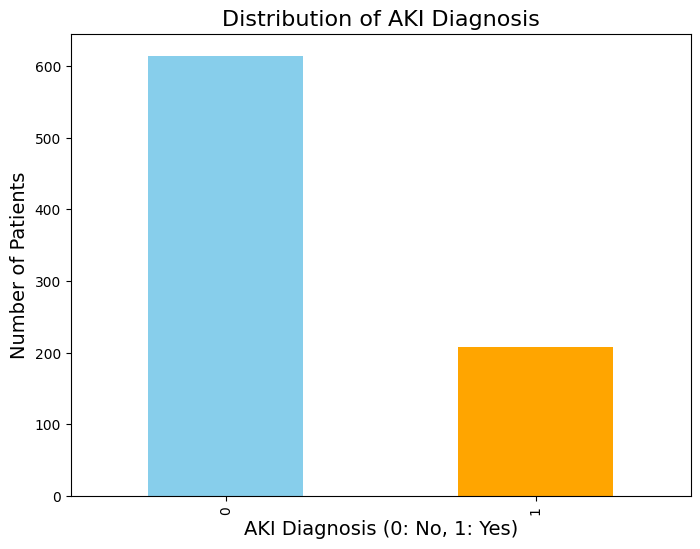

In [48]:
# Plot the distribution of AKI Diagnosis
final_population_df['AKI_diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))

# Add titles and labels
plt.title('Distribution of AKI Diagnosis', fontsize=16)
plt.xlabel('AKI Diagnosis (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Show the plot
plt.show()

In [49]:
#Compute the percentage of each class in the dataset
imbalance_ratio = final_population_df['AKI_diagnosis'].value_counts(normalize=True) * 100
print(imbalance_ratio)

AKI_diagnosis
0    74.695864
1    25.304136
Name: proportion, dtype: float64
